In [86]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [87]:
mydata = pd.read_csv("HW3.csv")
mydata.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


Purchase
0    1000
1    1000
dtype: int64


In [88]:
#Shuffle the data 
mydata = mydata.sample(frac=1).reset_index(drop=True)

#Let's take a look at how balanced the dataset is 
uniqueCounts = mydata.groupby("Purchase").size()
#Dataset is balanced, so we do not need to resample

#Drop ID Column
data = mydata.drop("Purchase", axis = 1)

data.head()

data.describe()
#There does not appear to be any unusual or missing values. 

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.006000,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,102.560745
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.077246,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,186.749816
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,1.855000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,152.532500
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1500.060000


In [111]:
from sklearn.model_selection import train_test_split # Split validation class

# A simple linear regression with only one feature
X = data.loc[:, data.columns.difference(["Spending", "1st_update_days_ago"])] #spending is target and 1st update days ago had high multicolinearity 
y = data['Spending'].values

X_train, X_test, y_train, y_test = train_test_split( # Split validation
    X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split( # Split validation
    X_train, y_train, test_size=0.3, random_state=42)

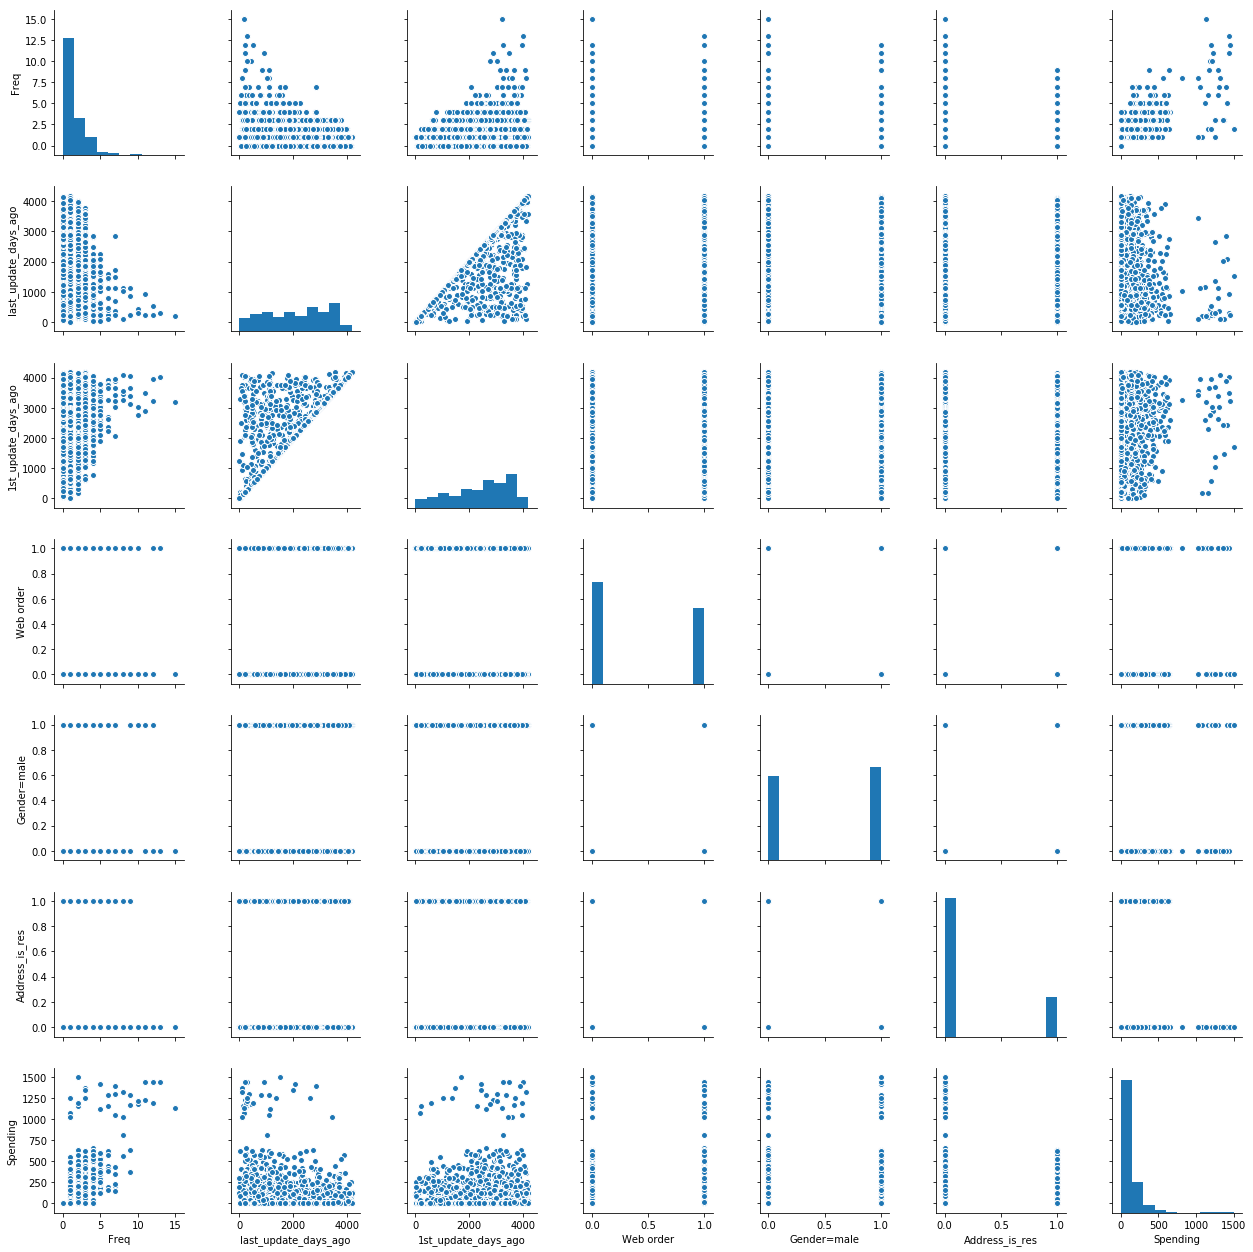

In [112]:
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["Freq", "last_update_days_ago", "1st_update_days_ago", "Web order", "Gender=male", "Address_is_res","Spending"] # Select Attributes

sns.pairplot(data[cols], size=2.5) # Plot pairwise relationships in a dataset
plt.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
# plt.savefig('housing_dataset.png', dpi=300)
plt.show() # display figure

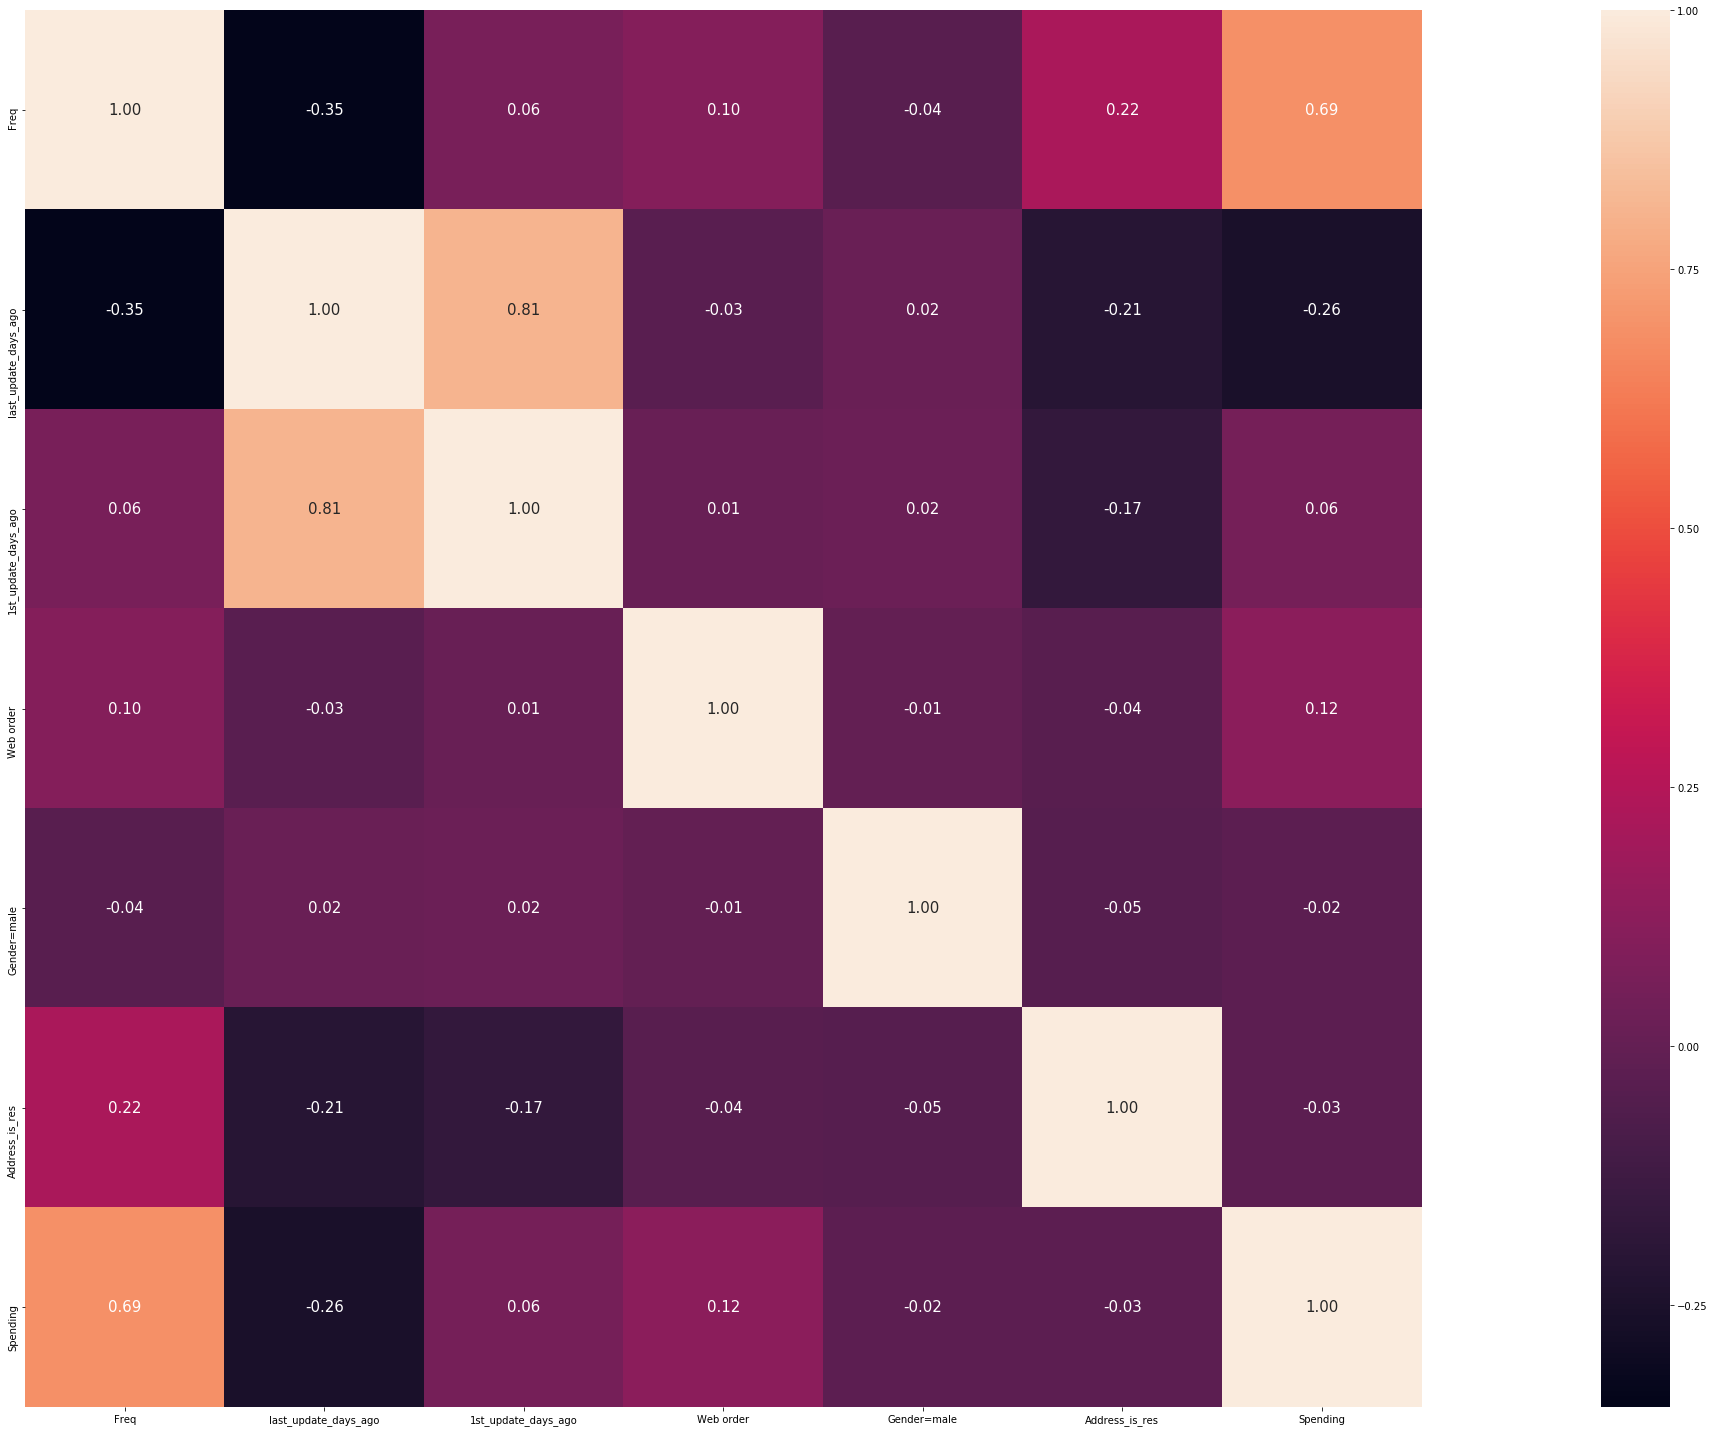

In [109]:
import numpy as np


cm = np.corrcoef(data[cols].values.T) # Return Pearson product-moment correlation coefficients

#sns.set(font_scale=1.5)
# Heatmap visualisation of pearson correlation coefficients
# Documentation https://seaborn.pydata.org/generated/seaborn.heatmap.html
hm = sns.heatmap(cm,                # Plot rectangular data as a color-encoded matrix
                 cbar=True,         # Whether to draw a colorbar.
                 annot=True,        # If True, write the data value in each cell.
                 square=True,       # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 fmt='.2f',         # String formatting code to use when adding annotations.
                 annot_kws={'size': 15}, # Keyword arguments for ax.text when annot is True
                 yticklabels=cols,  # If True, plot the column names of the dataframe.
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('correlation_coefficient.png', dpi=300)
plt.rcParams["figure.figsize"] = [10,20]
plt.show()

In [113]:
X_train.head()

,Address_is_res,Freq,Gender=male,US,Web order,last_update_days_ago,sequence_number,source_a,source_b,source_c,...,source_h,source_m,source_o,source_p,source_r,source_s,source_t,source_u,source_w,source_x
804,1,5,0,1,1,1577,1714,1,0,0,...,0,0,0,0,0,0,0,0,0,0
658,1,3,1,0,1,743,1179,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1448,0,0,1,0,0,3124,1119,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1183,0,1,1,0,0,427,984,0,0,0,...,0,0,0,0,0,0,0,0,1,0
129,0,13,0,1,1,281,919,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
slr2 = LinearRegression(normalize= "False")    # Linear Regression class
slr2.fit(X_train, y_train)   # Fit Model to data
y_train_pred = slr2.predict(X_train) # Apply model to train data
y_val_pred = slr2.predict(X_val)   # Apply model to validation data

print('Slope: %.3f', slr2.coef_)

Slope: %.3f [-6.58408916e+01  9.30069415e+01 -1.49979879e+00 -1.41931119e+01
  3.52879956e+00 -8.62792319e-03 -1.17404851e-02  5.31319815e+01
 -3.02726268e+00 -4.48634365e+01 -2.34110091e+01 -4.18573044e+00
 -8.25379156e+01 -3.67984882e+00  3.64346197e+01  1.83458513e+01
  6.65872060e+01  2.22344838e+01 -4.55445144e+00  4.53801244e+01
  1.09475469e+00  2.86157211e+01]


In [161]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#See all regression metrics here http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
print('MSE train: %.3f, validation: %.3f' % ( # mean_absolute_error
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred)))
print('MAE train: %.3f, validation: %.3f' % ( # mean_squared_error
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_val_pred)))

MSE train: 17915.847, validation: 17189.662
MAE train: 79.001, validation: 77.309


In [150]:
# Find optimal paramater for Lasso with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the max_depth that minimizes MSE
parameters = {'fit_intercept': ["TRUE", "FALSE"], 'normalize': [ "TRUE"]} # range of parameters for the depth of the tree
gs_lasso = GridSearchCV(Lasso(), parameters, n_jobs=4, scoring = "neg_mean_absolute_error") #GridSearchCV
gs_lasso.fit(X_train, y_train) # Fit model
lasso_model = gs_lasso.best_estimator_ # best performance
print (gs_lasso.best_score_, gs_lasso.best_params_) #parameters that gave the best performance

-82.91861225529763 {'fit_intercept': 'TRUE', 'normalize': 'TRUE'}


In [162]:
gs_linear= LinearRegression(normalize = "TRUE")
gs_linear = gs_linear.fit(X_train, y_train)
y_pred_linear = gs_lasso.predict(X_test)
print('MSE train: %.3f, validation: %.3f' % ( #MSE 
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_pred_linear))) #MSE Validation Set
print('MAE train: %.3f, validation: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_pred_linear))) #MAE Validation Set

MSE train: 17915.847, validation: 14200.716
MAE train: 79.001, validation: 76.523


**LASSO**

In [132]:
from sklearn.linear_model import Lasso # Lasso Regression class

lasso = Lasso()   # Lasso 
                           # alpha : constant that multiplies the L1 term. 
                           # Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, 
                           # solved by the LinearRegression object.
lasso.fit(X_train, y_train) # Fit model to data
y_train_pred = lasso.predict(X_train) # Apply model to train data
y_val_pred = lasso.predict(X_val)   # Apply model to validation data
print(lasso.coef_)


[-6.23392127e+01  9.24095763e+01 -0.00000000e+00 -5.45067121e+00
  1.19659913e+00 -7.25341025e-03 -1.27376976e-02  3.96371250e+01
 -0.00000000e+00 -3.18033503e+01 -5.07235118e+00 -2.29291583e+00
 -6.96110477e+01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.94946322e+01  0.00000000e+00 -0.00000000e+00  3.30373392e+01
 -0.00000000e+00  0.00000000e+00]


In [133]:
print('MSE train: %.3f, validation: %.3f' % ( # MSE
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred))) # MSE Validation Set
print('MAE train: %.3f, validation: %.3f' % ( # MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_val_pred))) # MAE Validation Set

MSE train: 18085.196, validation: 17028.597
MAE train: 80.100, validation: 77.564


In [118]:
# Find optimal paramater for Lasso with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the max_depth that minimizes MSE
parameters = {'alpha': [0, .001,.01,.1]} # range of parameters for the depth of the tree
gs_lasso = GridSearchCV(Lasso(), parameters, n_jobs=4, scoring = "neg_mean_absolute_error") #GridSearchCV
gs_lasso.fit(X_train, y_train) # Fit model
lasso_model = gs_lasso.best_estimator_ # best performance
print (gs_lasso.best_score_, gs_lasso.best_params_) #parameters that gave the best performance

-82.67863405366182 {'alpha': 0.1}


In [129]:
gs_lasso= Lasso(alpha = .1)
gs_lasso = gs_lasso.fit(X_train, y_train)
y_pred_lasso = gs_lasso.predict(X_val)
print('MSE train: %.3f, validation: %.3f' % ( #MSE 
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_pred_lasso))) #MSE Validation Set
print('MAE train: %.3f, validation: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_pred_lasso))) #MAE Validation Set

MSE train: 17920.583, validation: 17139.557
MAE train: 79.029, validation: 77.170


In [134]:
from sklearn.linear_model import Ridge # Ridge Regression class

ridge = Ridge() # Regularization strength; must be a positive float. 
                         # Larger values specify stronger regularization. 
                         # Alpha corresponds to C^-1 in other linear models such as LogisticRegression
ridge.fit(X_train, y_train) # Fit Model
y_train_pred = ridge.predict(X_train) # Apply model to train data
y_val_pred = ridge.predict(X_val)  # Apply model to validation data
print(ridge.coef_) # Display coefficients

print('MSE train: %.3f, validation: %.3f' % ( #MSE 
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred))) #MSE Validation Set
print('MAE train: %.3f, validation: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_val_pred))) #MAE Validation Set

[-6.56138221e+01  9.29932613e+01 -1.49068552e+00 -1.40437134e+01
  3.67959543e+00 -8.47338516e-03 -1.18086142e-02  5.09922220e+01
 -4.71927823e+00 -4.55908020e+01 -2.45461954e+01 -5.80033012e+00
 -8.25846738e+01 -4.97783143e+00  3.33666777e+01  1.45093295e+01
  6.41103350e+01  2.02353418e+01 -6.07652873e+00  4.33522892e+01
 -3.51284524e-01  2.54191504e+01]
MSE train: 17916.413, validation: 17173.073
MAE train: 79.021, validation: 77.257


In [102]:
# Find optimal paramater for Ridge with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the max_depth that minimizes MSE
parameters = {'alpha': [0, .001,.01,.1]} # range of parameters for the depth of the tree
gs_ridge = GridSearchCV(Ridge(), parameters, n_jobs=4, scoring = "neg_mean_squared_error") #GridSearchCV
gs_ridge.fit(X_train, y_train) # Fit model
ridge_model = gs_ridge.best_estimator_ # best performance
print (gs_ridge.best_score_, gs_ridge.best_params_) #parameters that gave the best performance

-19343.900568361034 {'alpha': 0.1}


In [120]:
gs_ridge= Ridge(alpha = .1)
gs_ridge = gs_ridge.fit(X_train, y_train)
y_pred_ridge = gs_ridge.predict(X_val)
print('MSE train: %.3f, validation: %.3f' % ( #MSE 
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_pred_ridge))) #MSE val Set
print('MAE train: %.3f, validation: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_pred_ridge))) #MAE val Set

MSE train: 17920.583, validation: 17187.729
MAE train: 79.029, validation: 77.301


In [126]:
gs_dt= DecisionTreeRegressor()
gs_dt = gs_dt.fit(X_train, y_train)
y_pred_DTR = gs_dt.predict(X_val)
print('MSE train: %.3f, validation: %.3f' % ( #MSE 
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_pred_DTR))) #MSE Test Set
print('MAE train: %.3f, validation: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_pred_DTR))) #MAE Test Set

MSE train: 17920.583, validation: 29525.820
MAE train: 79.029, validation: 86.002


In [141]:
# Find optimal paramater for DecisionTreeRegressor with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Find the max_depth that minimizes MSE
parameters = {'max_depth':range(3,50)} # range of parameters for the depth of the tree
gs_dt = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4, scoring = "neg_mean_squared_error") #GridSearchCV
gs_dt.fit(X, y) # Fit model
tree_model = gs_dt.best_estimator_ # best performance
print (gs_dt.best_score_, gs_dt.best_params_) #parameters that gave the best performance

-18742.915120926842 {'max_depth': 4}


In [143]:
gs_dt= DecisionTreeRegressor(max_depth = 5)
gs_dt = gs_dt.fit(X_train, y_train)
y_pred_DTR = gs_dt.predict(X_val)
print('MSE train: %.3f, validation: %.3f' % ( #MSE 
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_pred_DTR))) #MSE Test Set
print('MAE train: %.3f, validation: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_pred_DTR))) #MAE Test Set

MSE train: 17916.413, validation: 18806.765
MAE train: 79.021, validation: 73.284


In [127]:
gs_knn= KNeighborsRegressor()
gs_knn = gs_knn.fit(X_train, y_train)
y_pred_knn = gs_knn.predict(X_val)
print('MSE train: %.3f, validation: %.3f' % ( #MSE 
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_pred_knn))) #MSE Validation Set
print('MAE train: %.3f, test: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_pred_knn))) #MAE Validation Set

MSE train: 17920.583, validation: 38090.717
MAE train: 79.029, test: 121.819


In [106]:
# Find the paramets that minimizes MSE
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors':range(3,50), 'weights':["uniform", "distance"] } # range of parameters for the depth of the tree
gs_knn = GridSearchCV(KNeighborsRegressor(), parameters, n_jobs=4, scoring = "neg_mean_squared_error") #GridSearchCV
gs_knn.fit(X, y) # Fit model
knn_model = gs_knn.best_estimator_ # best performance
print (gs_knn.best_score_, gs_knn.best_params_) #parameters that gave the best performance

-35000.88213449229 {'n_neighbors': 48, 'weights': 'uniform'}


In [122]:
gs_knn= KNeighborsRegressor(n_neighbors = 14, weights = "uniform")
gs_knn = gs_knn.fit(X_train, y_train)
y_pred_knn = gs_knn.predict(X_val)
print('MSE train: %.3f, validation: %.3f' % ( #MSE 
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_pred_knn))) #MSE Validation Set
print('MAE train: %.3f, test: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_val, y_pred_knn))) #MAE Validation Set

MSE train: 17920.583, validation: 35612.849
MAE train: 79.029, test: 114.736


Final Model Performance of Test Data: Optimized Decision Tree

In [164]:
gs_dt= DecisionTreeRegressor(max_depth = 5)
gs_dt = gs_dt.fit(X_train, y_train)
y_pred_DTR = gs_dt.predict(X_test)
print('MSE train: %.3f, Test: %.3f' % ( #MSE 
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_pred_DTR))) #MSE Test Set
print('MAE train: %.3f, Test: %.3f' % ( #MAE
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_pred_DTR))) #MAE Test Set

MSE train: 17915.847, Test: 20868.244
MAE train: 79.001, Test: 77.182
